# 인공신경망 - 100 에포크마다 산점도 시각화

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
# 인공신경망 모델 클래스 정의
class SimpleNet(nn.Module):
    
    
    """
    이진 분류 문제
    입력층 2개 , 은닉층 1개 (노드 1개), 출력층 1개 
    (시그모이드 활성화 함수 사용)
    
    """
    
    def __init__(self):
        super(SimpleNet, self).__init__() # 부모클래스에 메서드 호출하는 방법
        self.fc1 = nn.Linear(2, 5)
        self.fc2 = nn.Linear(5, 1)
        pass
    
    
    def forward(self, x ):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x


In [10]:
# 데이터 생성 
X = torch.randn(100, 2)
y = ((X[:,0] > 0) & (X[:,1] > 0)).float()
print(X)
print(y)

tensor([[-0.4203, -1.8097],
        [ 0.0425,  0.7547],
        [-0.1192,  1.2574],
        [-0.9716,  0.7451],
        [-0.8625,  1.5595],
        [-0.8204,  0.2246],
        [-0.0142, -2.6405],
        [ 1.3300,  1.4518],
        [-0.7944,  0.4462],
        [ 0.0613, -0.8254],
        [-0.6104,  0.8612],
        [ 0.0347, -1.5054],
        [ 0.0071,  1.6252],
        [ 0.2573,  0.5946],
        [ 0.0900,  0.4325],
        [-0.4625,  0.9224],
        [ 1.1588,  0.1830],
        [ 1.6087,  1.8558],
        [ 0.7796,  1.0716],
        [ 1.5109, -0.5045],
        [-0.2054, -1.8715],
        [-0.3734,  1.0155],
        [ 0.4733, -0.7728],
        [ 0.9050, -1.3554],
        [ 1.2859, -0.6856],
        [ 0.5307, -0.6940],
        [-1.3195,  0.7085],
        [ 0.1577,  0.0218],
        [-1.8710, -0.2760],
        [ 1.2374, -1.2286],
        [-0.4443, -0.6158],
        [-0.3836, -0.0737],
        [ 0.7107,  0.0198],
        [ 1.7449,  0.6267],
        [ 1.0918, -0.5922],
        [ 0.7428, -1

In [12]:
# 모델 생성 
model = SimpleNet()
print(model)

SimpleNet(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=1, bias=True)
)


In [13]:
# 손실 함수와 옵티마이저를 정의합니다.
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

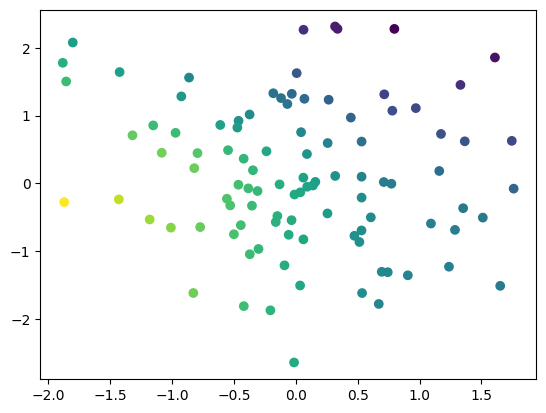

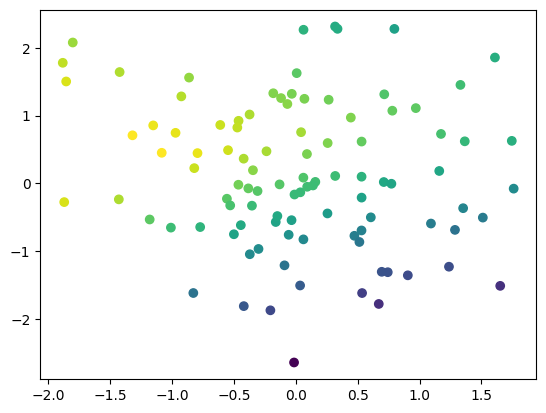

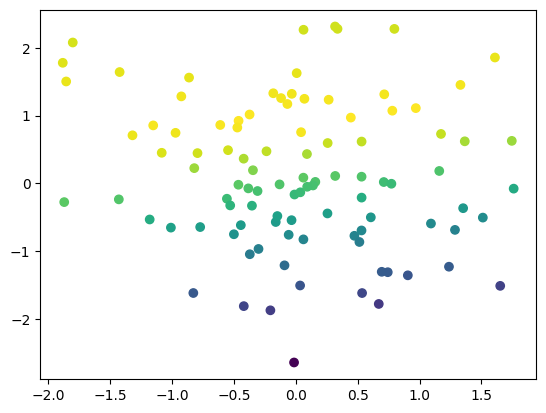

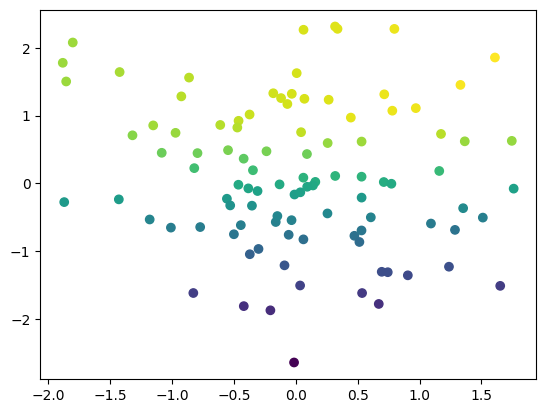

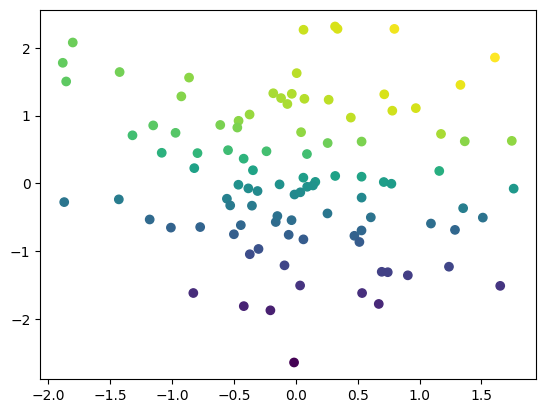

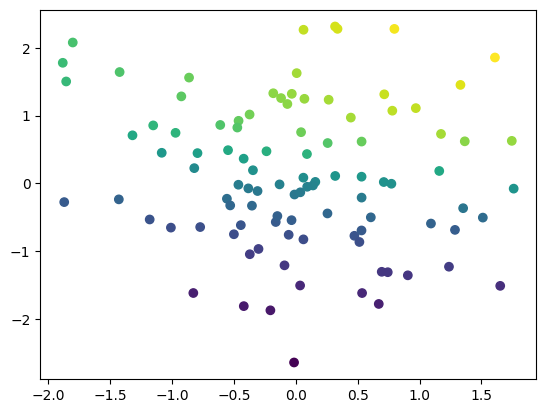

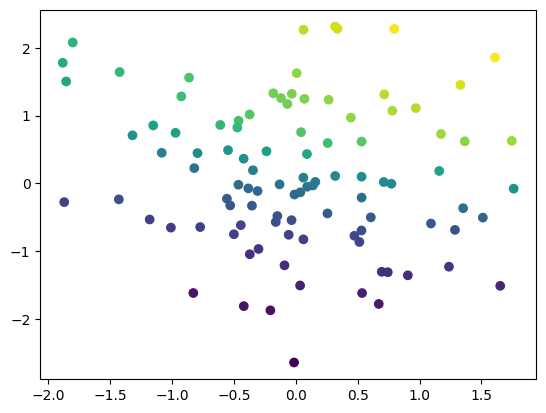

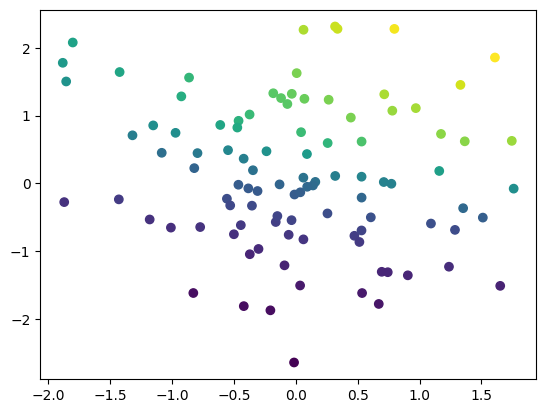

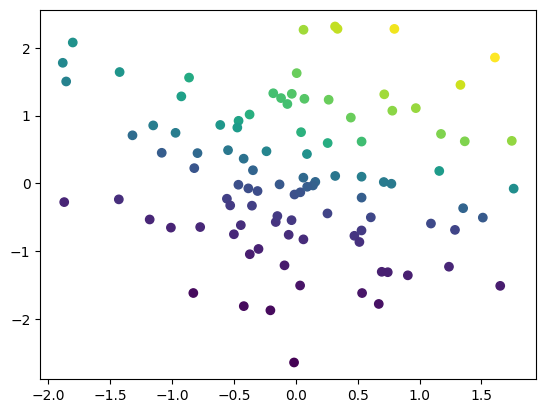

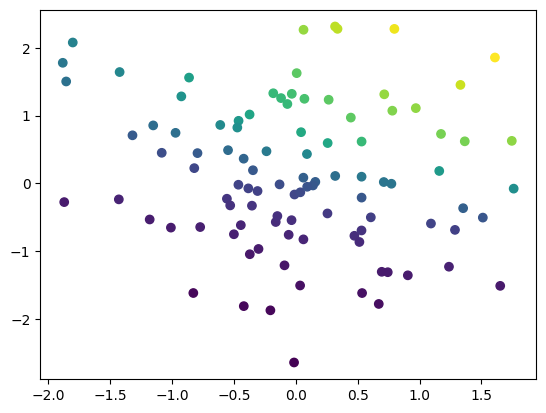

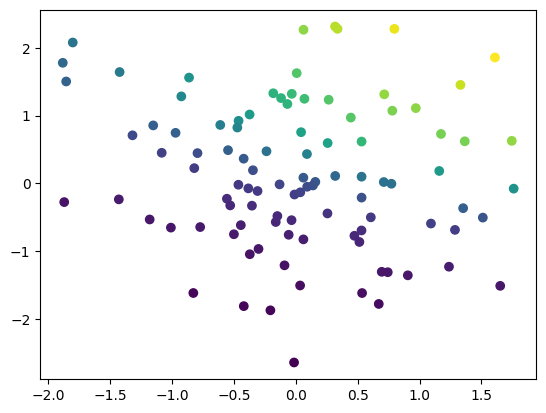

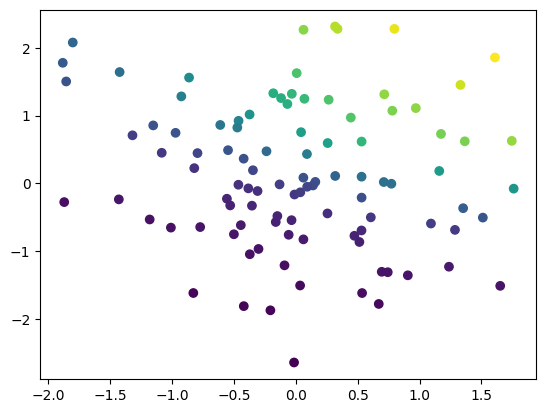

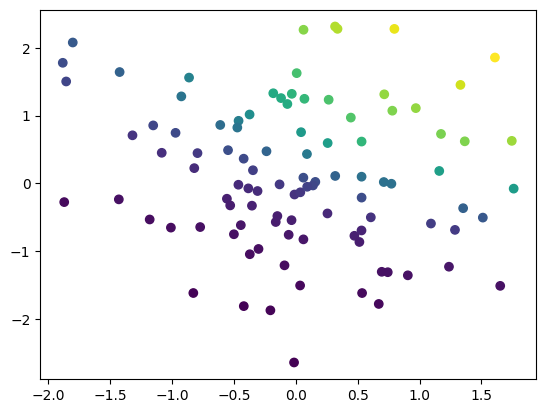

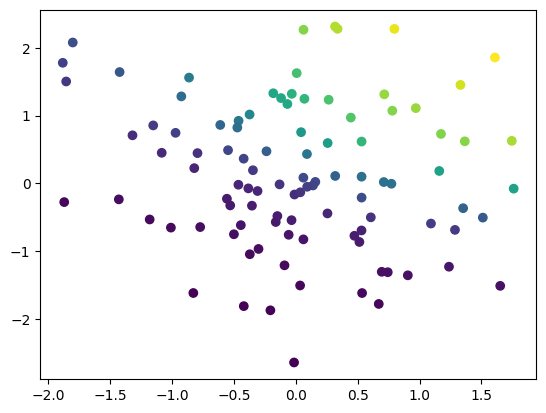

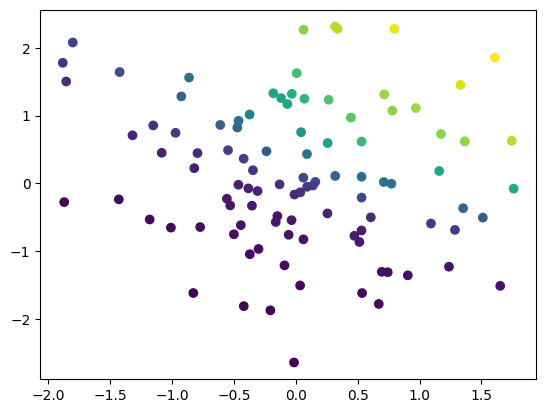

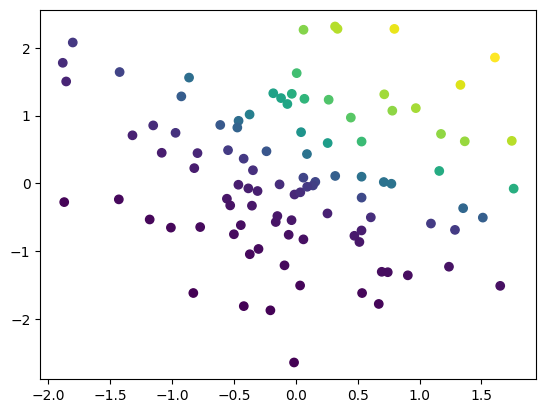

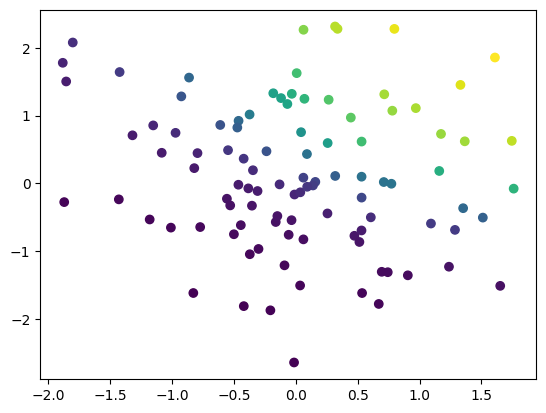

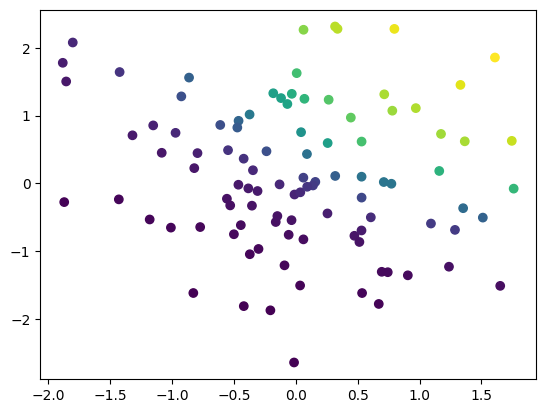

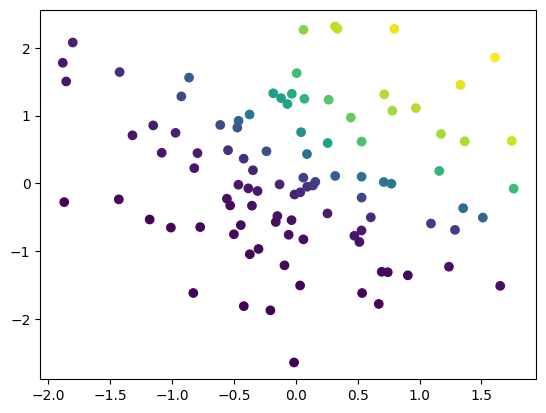

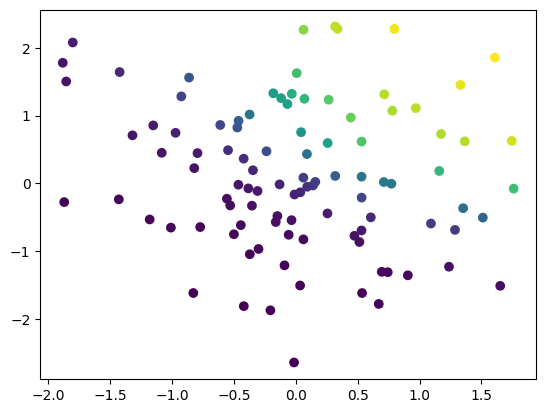

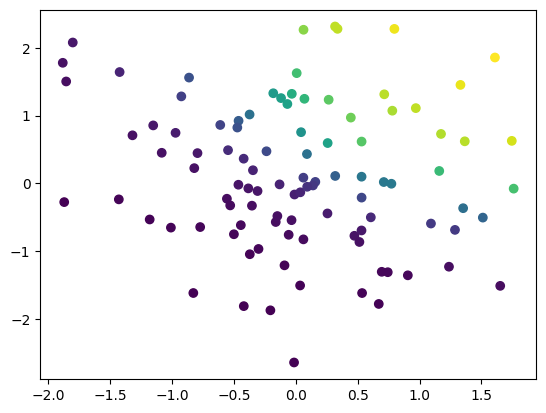

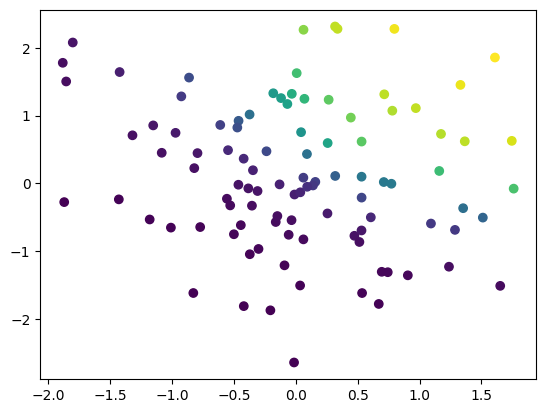

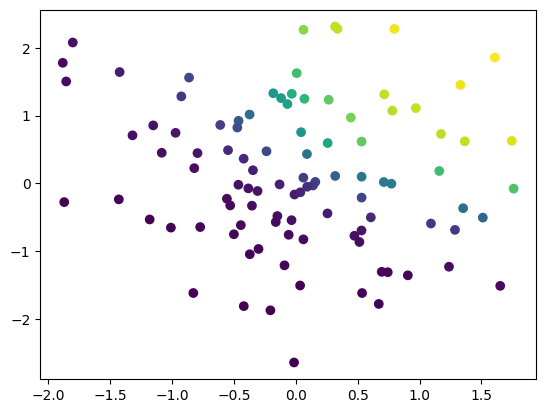

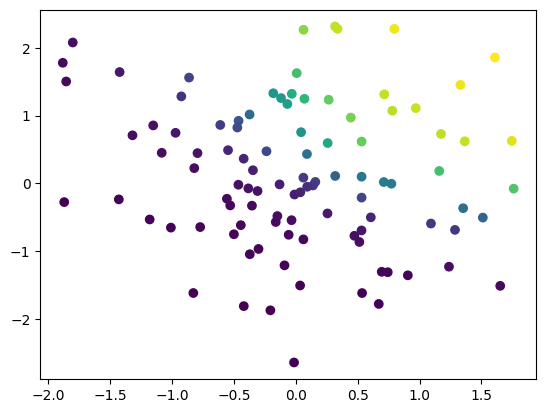

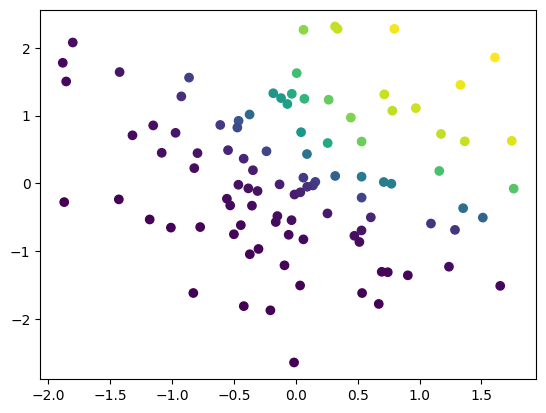

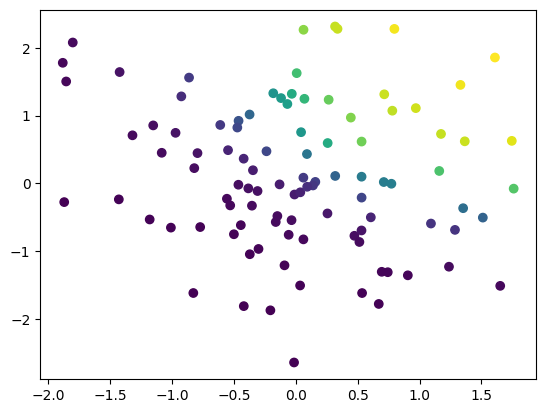

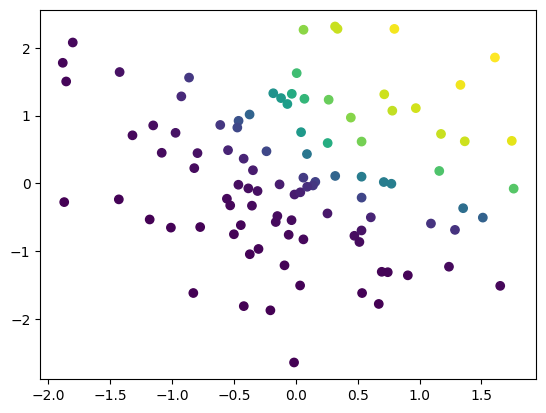

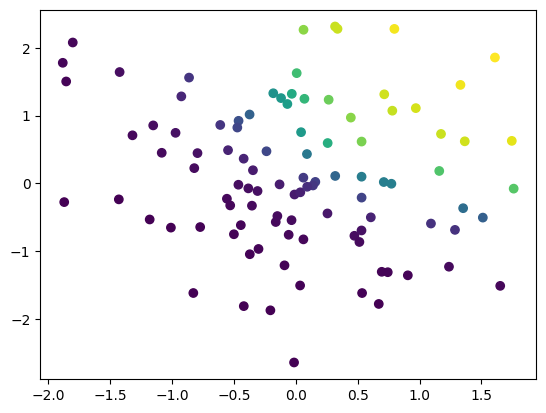

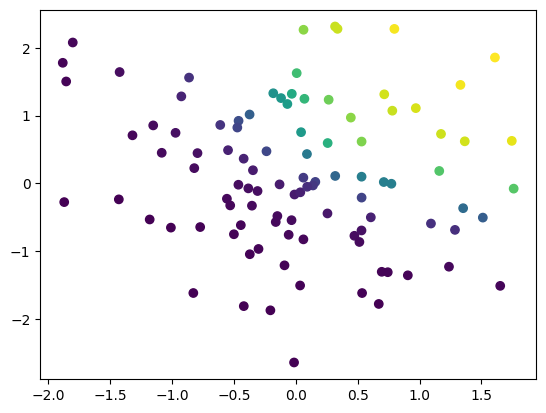

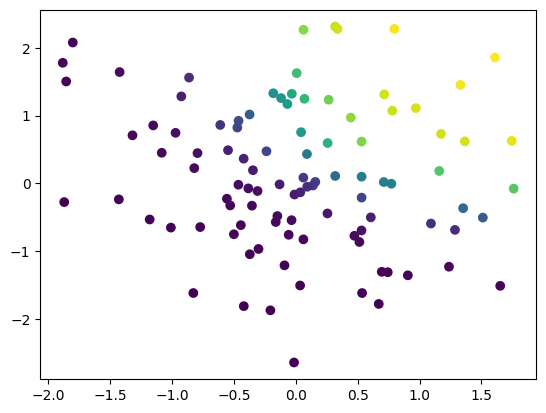

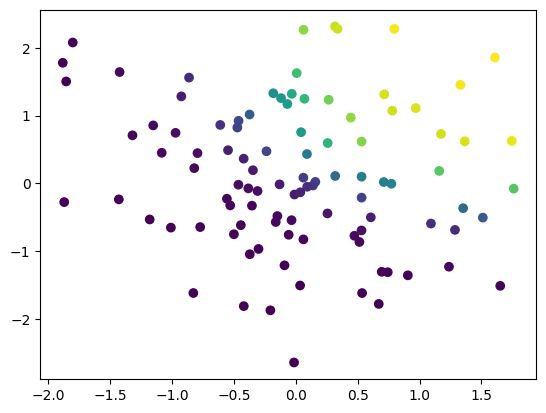

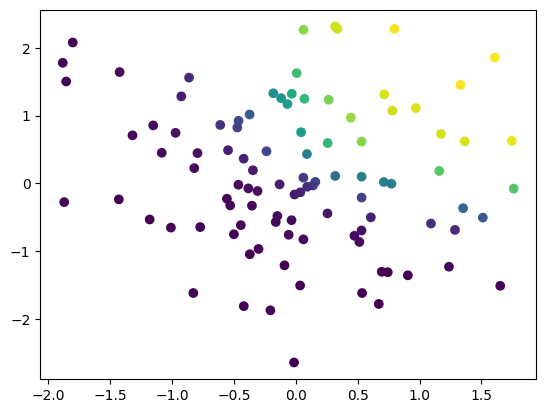

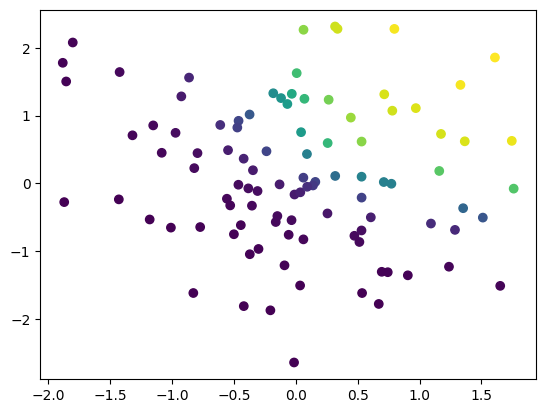

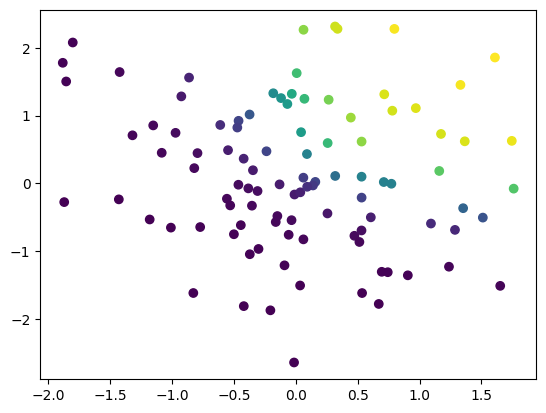

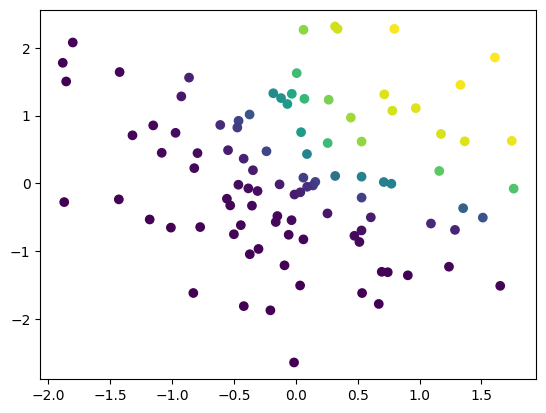

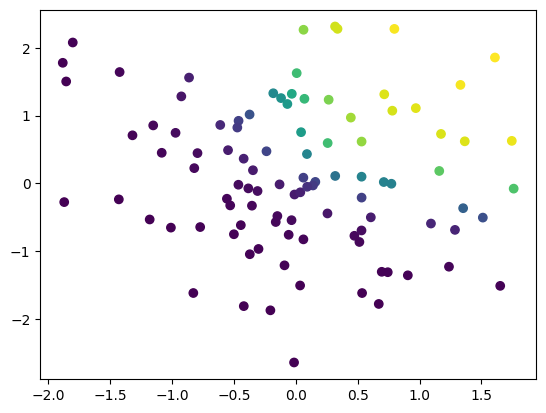

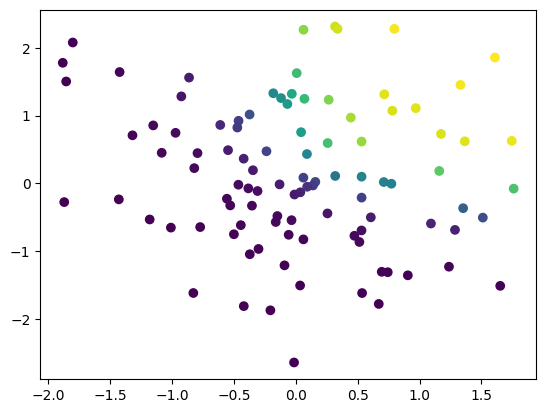

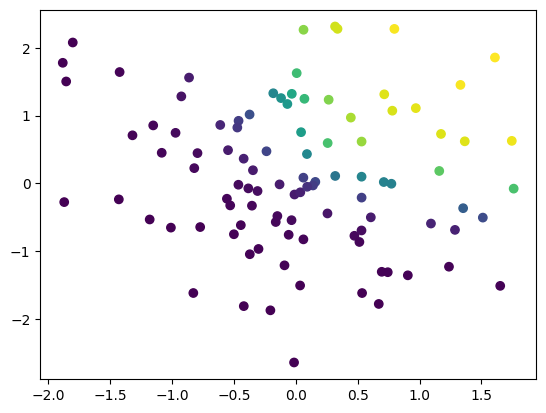

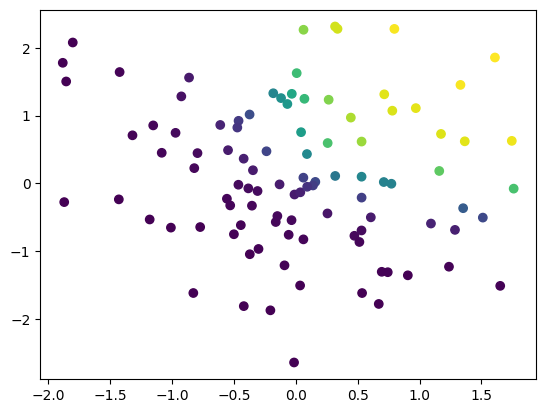

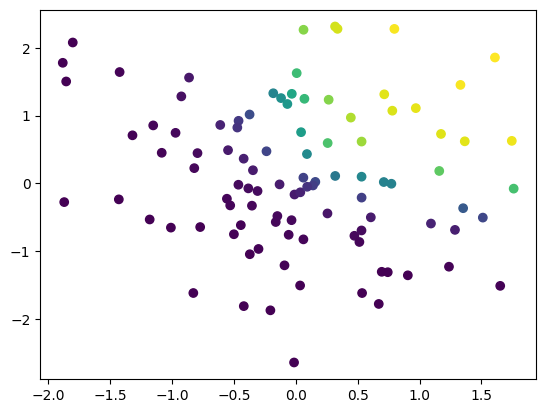

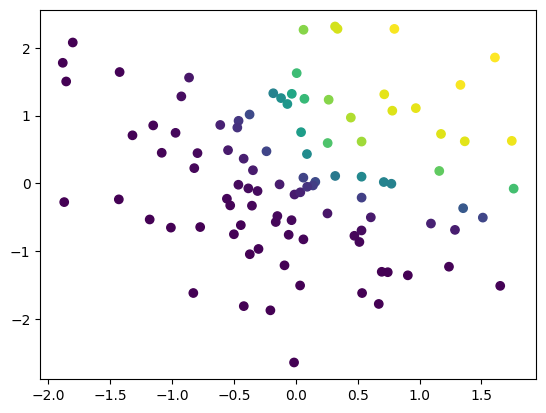

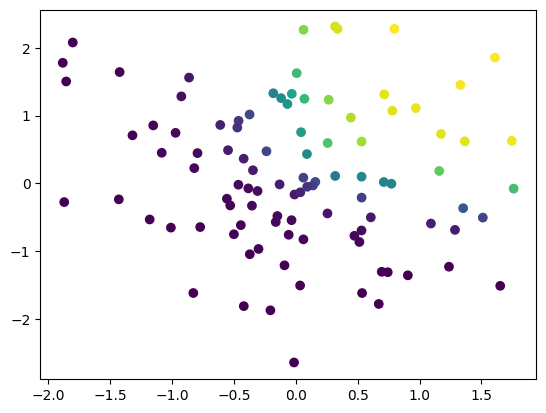

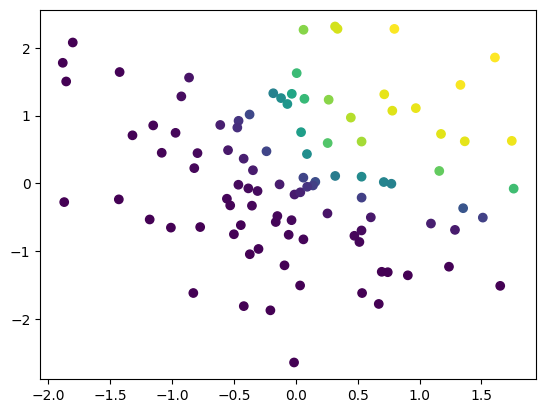

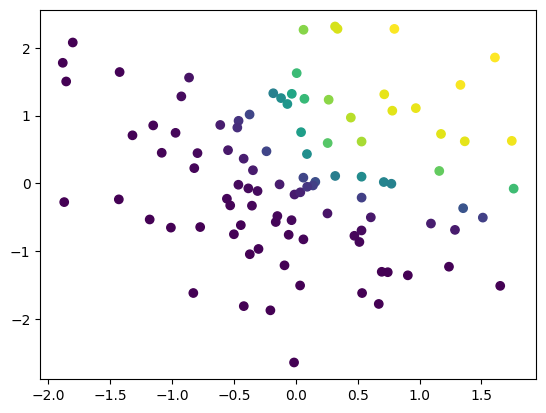

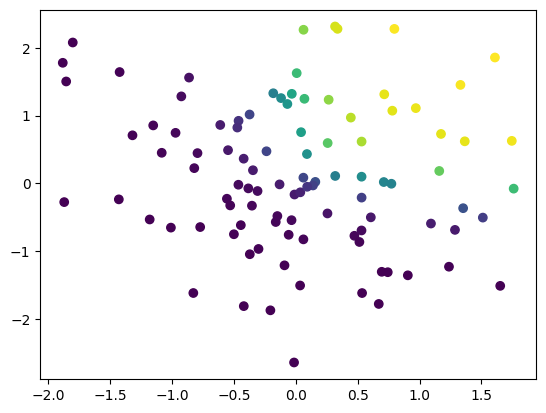

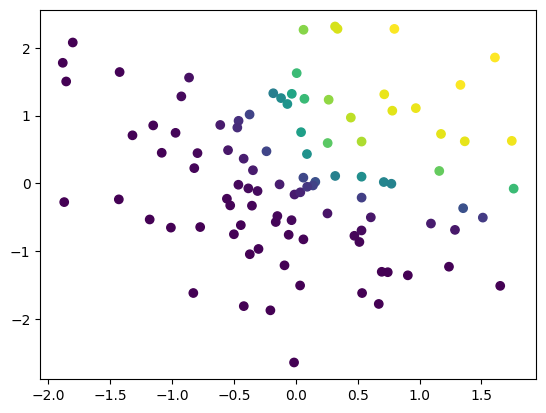

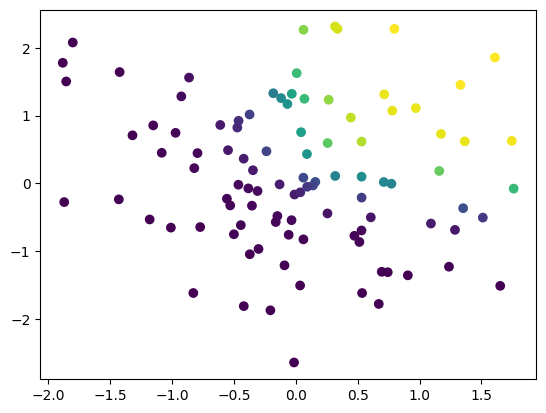

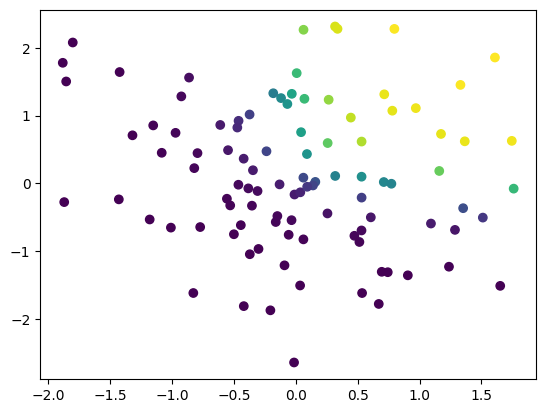

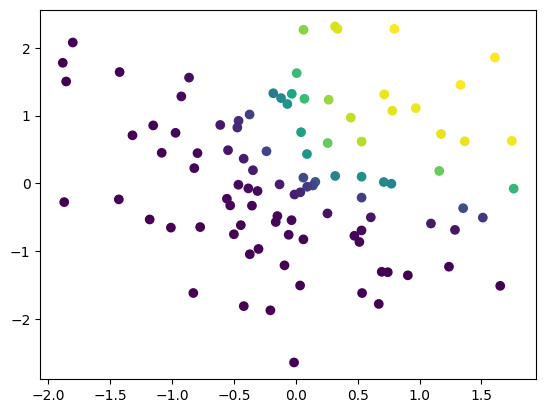

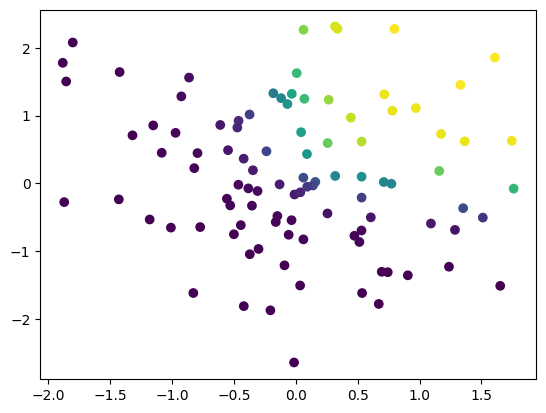

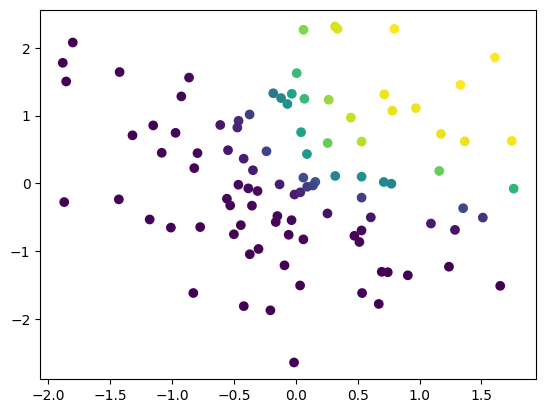

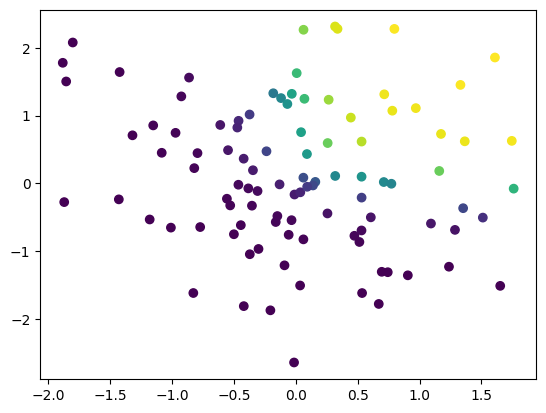

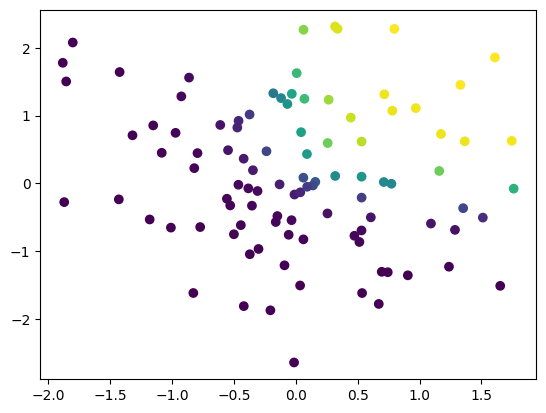

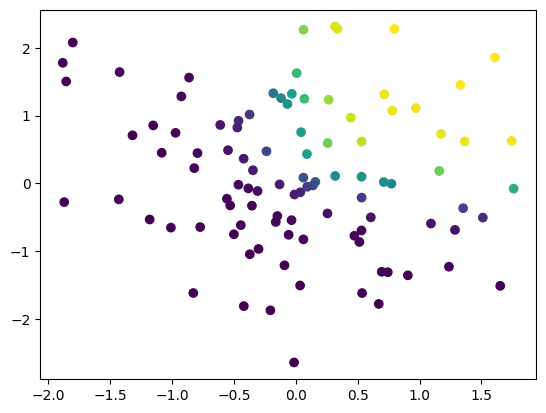

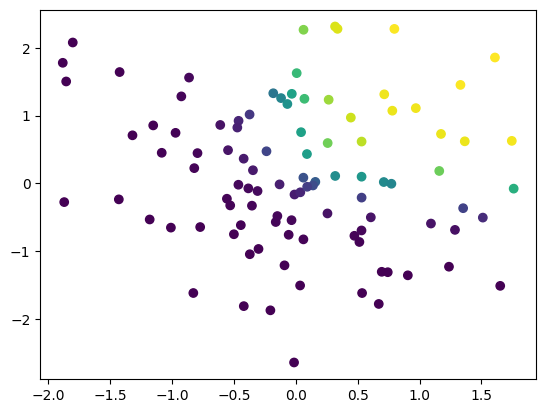

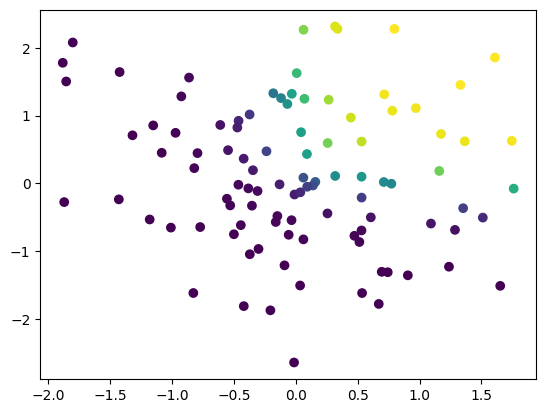

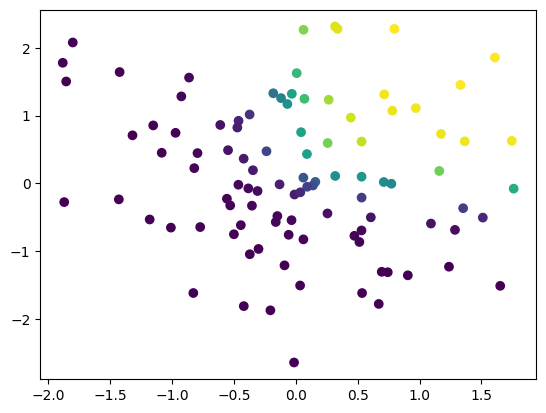

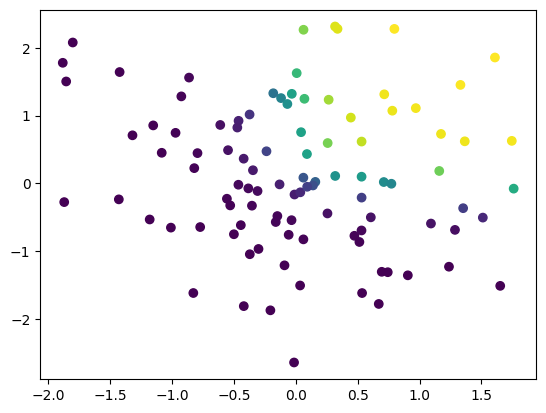

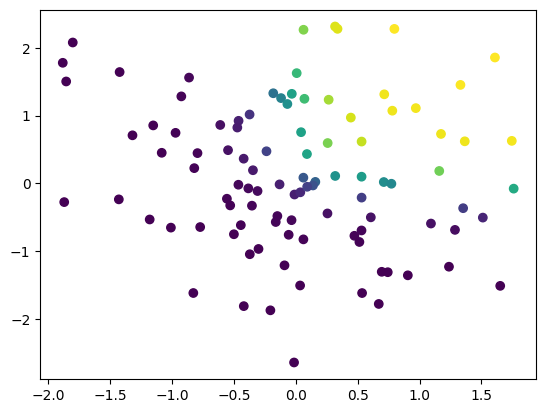

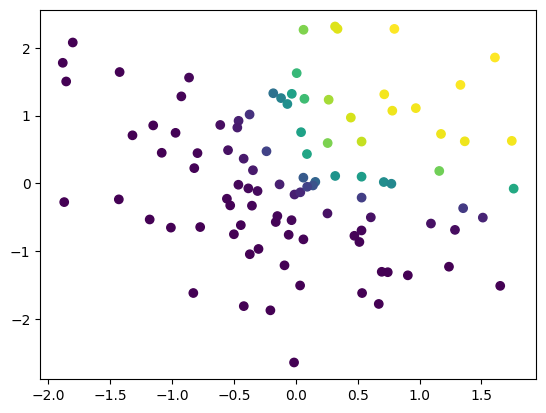

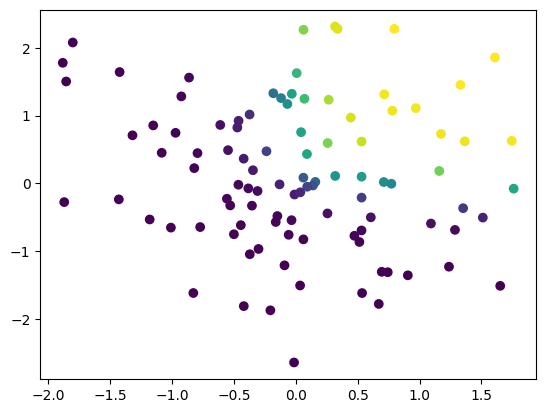

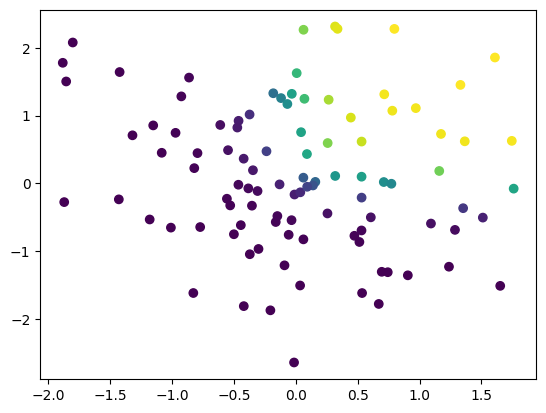

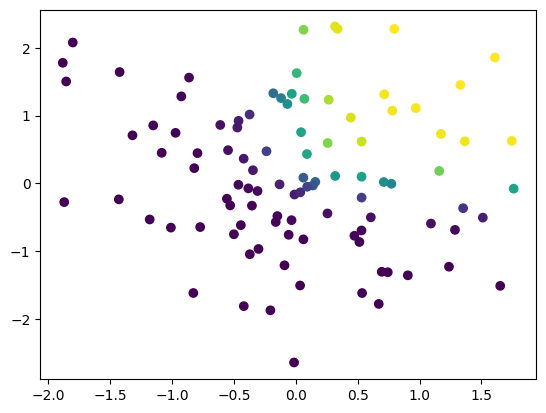

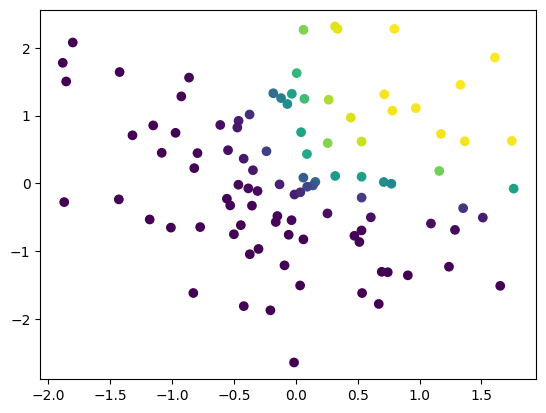

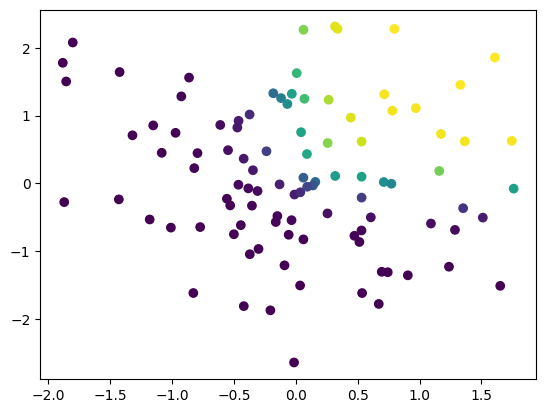

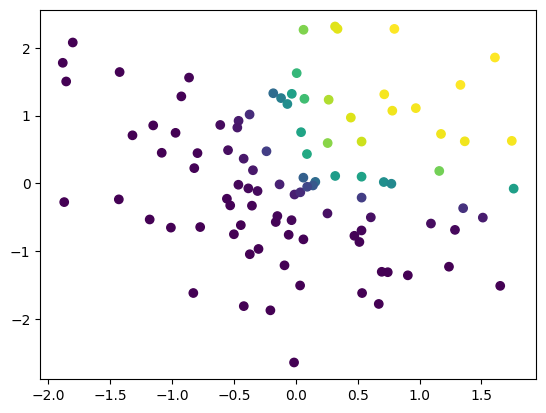

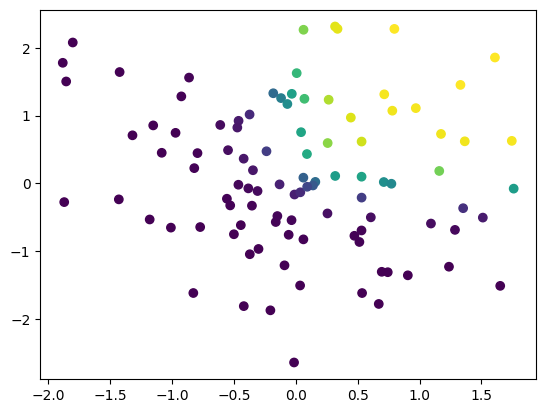

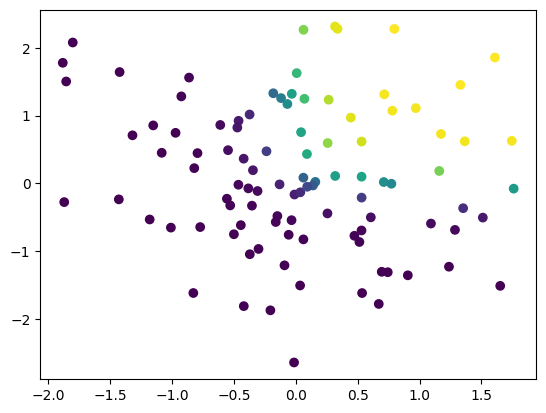

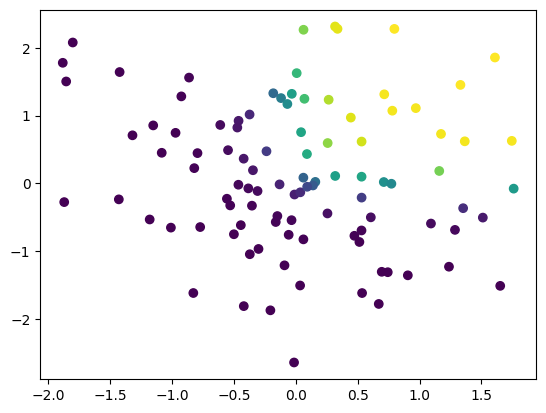

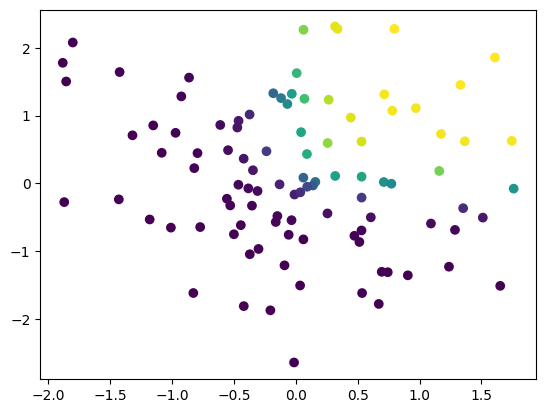

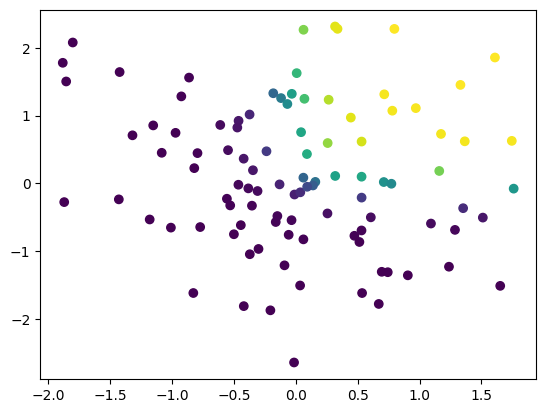

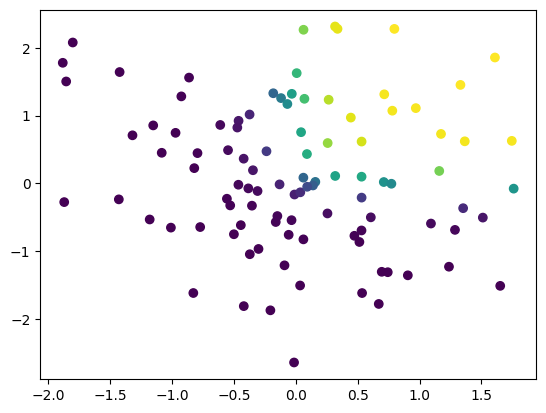

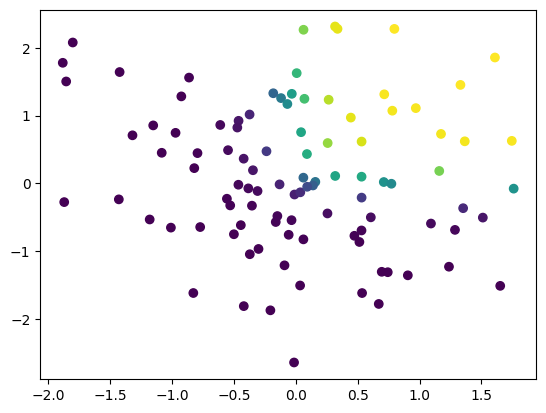

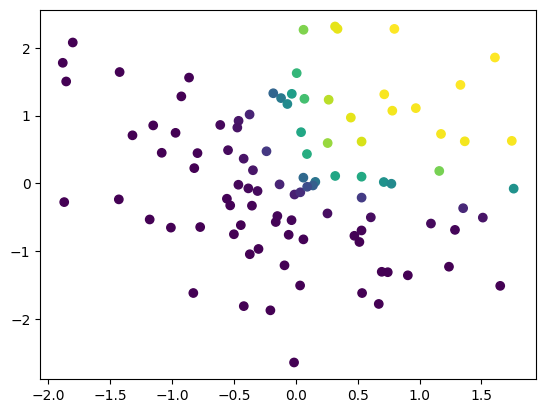

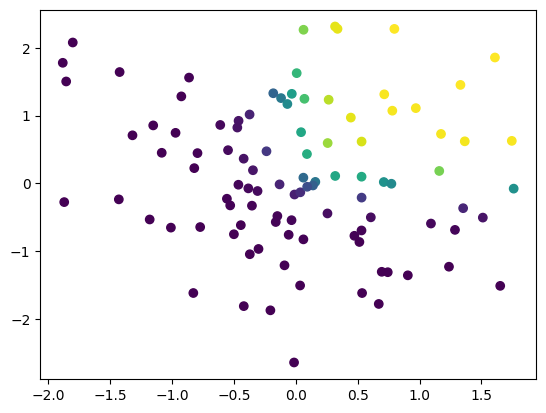

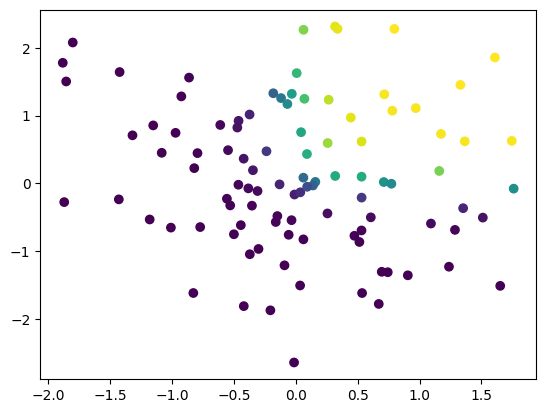

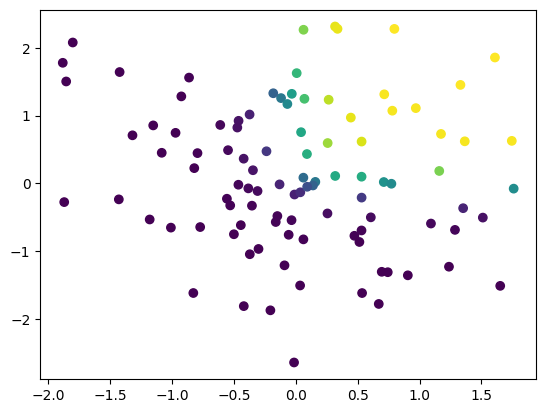

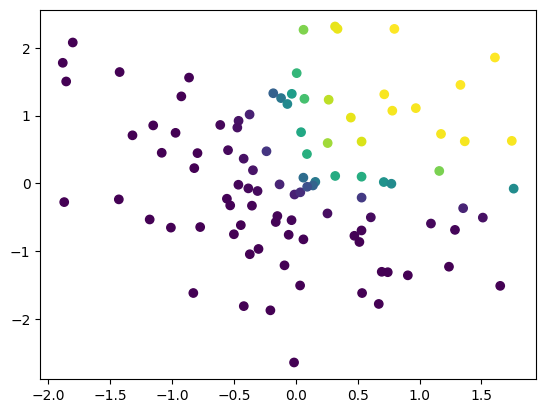

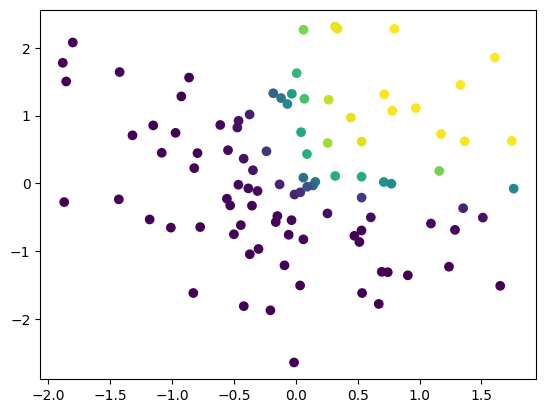

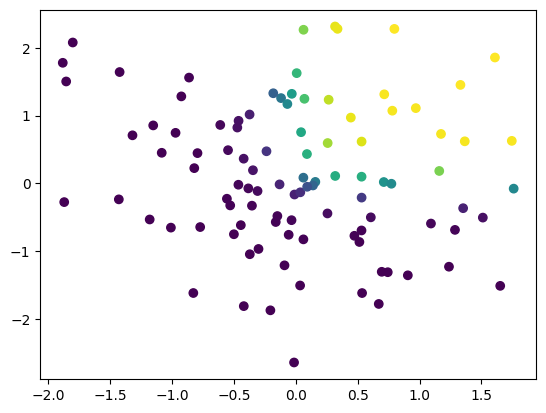

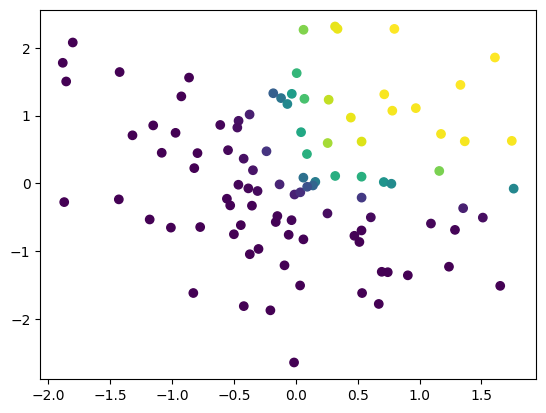

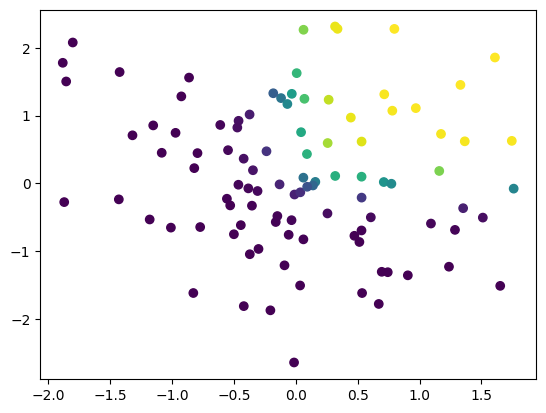

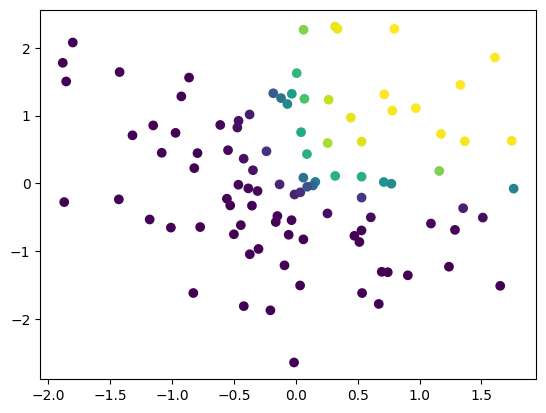

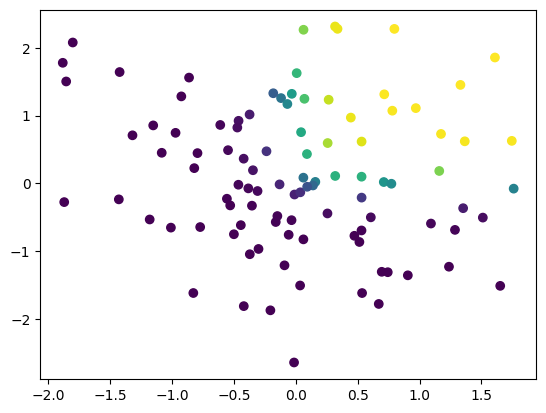

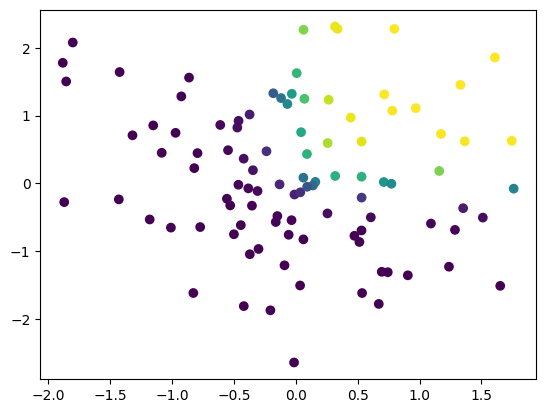

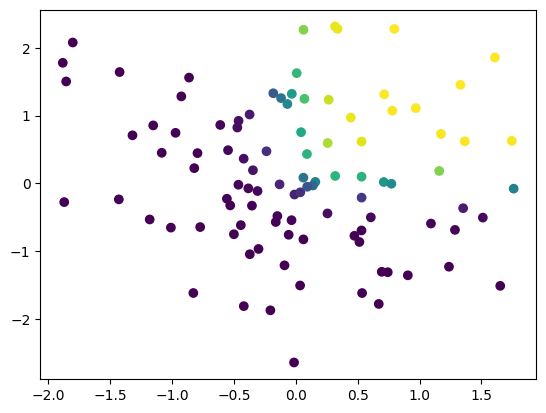

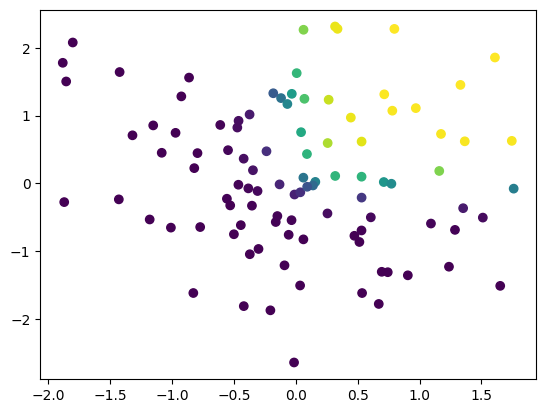

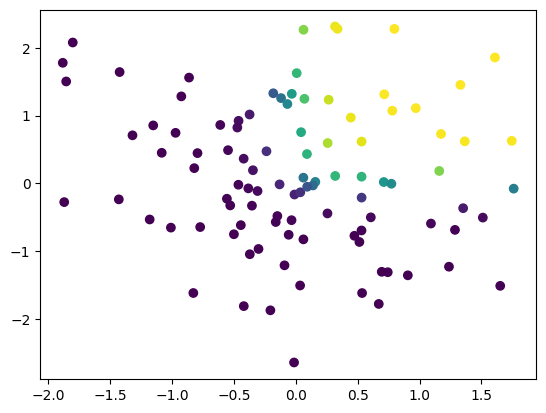

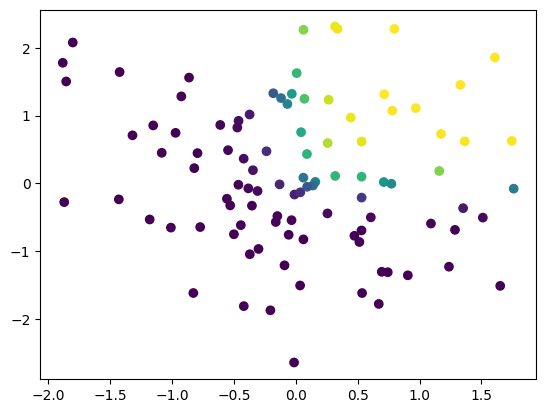

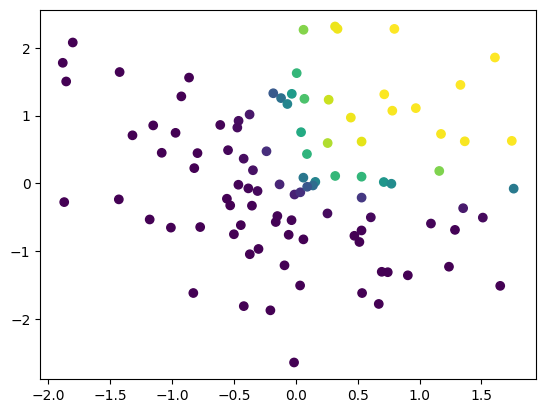

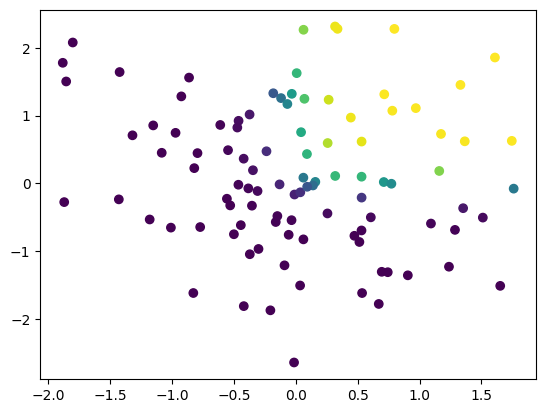

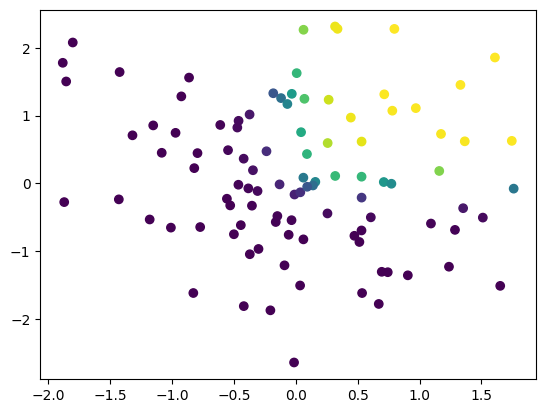

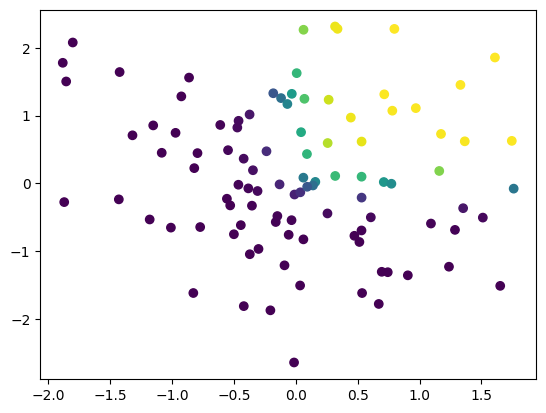

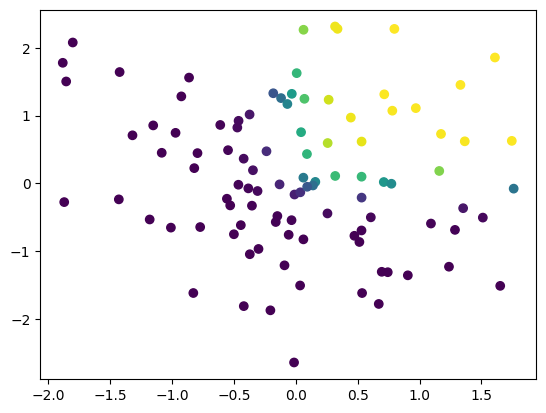

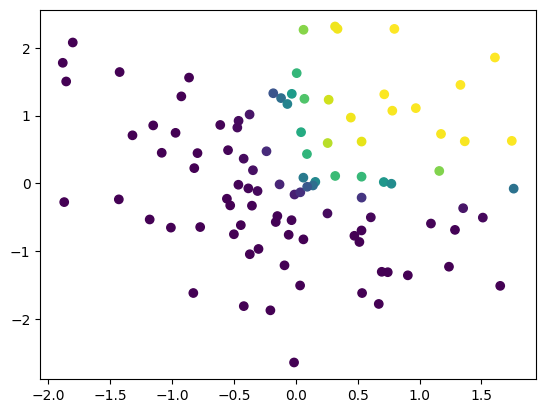

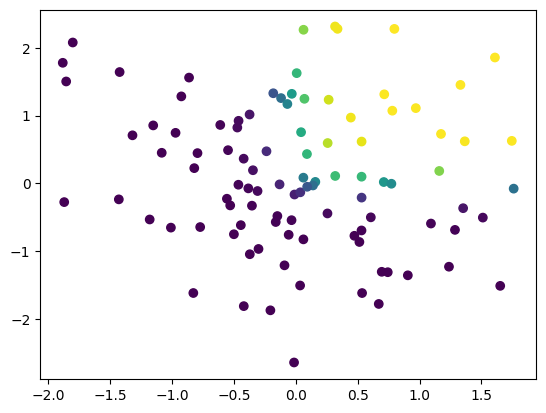

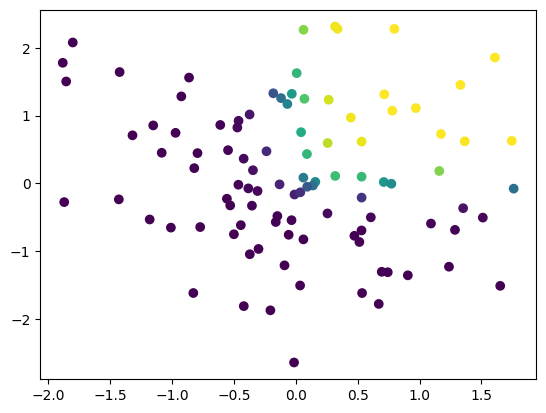

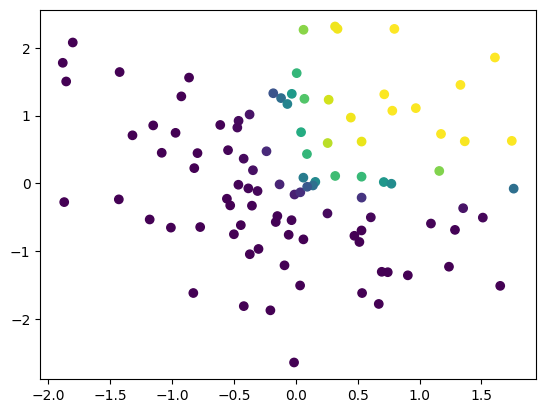

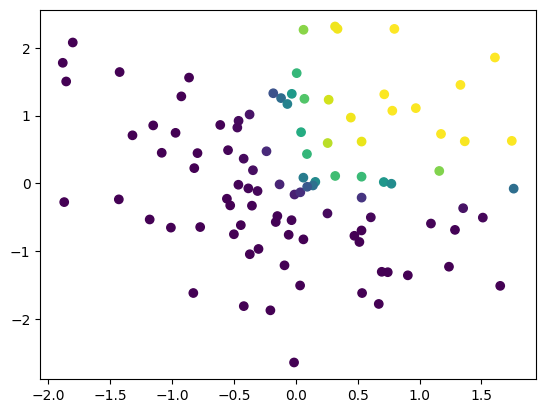

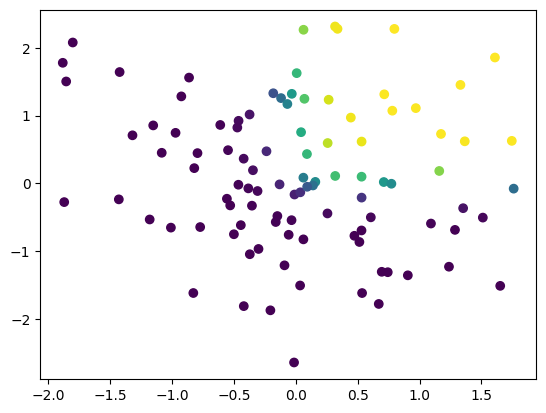

학습 종료 !


In [14]:
# 학습을 시작합니다.
for epoch in range(1000):
    # 순전파 단계
    y_pred = model(X)
    
    # 손실 계산 
    loss = criterion(y_pred.squeeze(), y)
    
    # 역전파 단계
    optimizer.zero_grad() # 옵티마이저의 모든 가중치에 대한 변화 0으로 초기화 => 이전 기울기 값이 남아있을 가능성이 있어서
    loss.backward()       # 손실함수 역전파 수행
    optimizer.step()      # 옵티마이저 가중치 엄데이트
    
    # 중간 결과를 시각화합니다.
    if epoch % 10 == 0:
        plt.clf()
        plt.scatter(X[:,0],X[:,1], c = y_pred.detach().numpy().squeeze())
        plt.show()
        
print("학습 종료 !")